# Derivadas 

# Derivadas para la red con 2 neuronas ocultas

## Definiciones

Consideremos la red con:
- Entrada \(x \in \mathbb{R}^3\) (dos variables + bias).
- Capa oculta con 2 neuronas:

$$
z_j = \sum_i w^{(1)}_{ij} \, x_i, 
\quad 
\phi_j = \sigma(z_j) = \frac{1}{1+e^{-z_j}}, 
\quad j=1,2
$$

- Salida lineal:

$$
\hat{y} = \sum_j w^{(2)}_j \, \phi_j
$$

La función de costo (para un ejemplo) es:

$$
C = \tfrac{1}{2}(\hat{y} - y)^2
$$

---

## Derivadas capa de salida

**Respecto a los pesos de salida** \(w^{(2)}_j\):

$$
\frac{\partial C}{\partial w^{(2)}_j}
= (\hat{y} - y)\,\phi_j
$$

---

## Derivadas capa oculta

**Respecto a los pesos de entrada** \(w^{(1)}_{ij}\):

Aplicamos la regla de la cadena:

$$
\frac{\partial C}{\partial w^{(1)}_{ij}}
= \frac{\partial C}{\partial \hat{y}}
  \frac{\partial \hat{y}}{\partial \phi_j}
  \frac{\partial \phi_j}{\partial z_j}
  \frac{\partial z_j}{\partial w^{(1)}_{ij}}
$$

1. $$\frac{\partial C}{\partial \hat{y}} = (\hat{y} - y)$$  
2. $$\frac{\partial \hat{y}}{\partial \phi_j} = w^{(2)}_j$$  
3. $$\frac{\partial \phi_j}{\partial z_j} = \phi_j (1-\phi_j)$$  
4. $$\frac{\partial z_j}{\partial w^{(1)}_{ij}} = x_i$$

Combinando:

$$
\frac{\partial C}{\partial w^{(1)}_{ij}}
= (\hat{y} - y)\, w^{(2)}_j \, \phi_j (1-\phi_j)\, x_i
$$

---

## Resumen matricial de gradientes

- Para la capa de salida:

$$
\frac{\partial C}{\partial W^{(2)}} = \phi^\top(\hat{y}-y)
$$

- Para la capa oculta:

$$
\frac{\partial C}{\partial W^{(1)}} 
= X^\top\Big( \big[ (\hat{y}-y)\,W^{(2)\top} \big] 
\odot \phi \odot (1-\phi)\Big)
$$

donde \(\odot\) es el producto elemento a elemento.

---

## Interpretación

- Los gradientes de la capa de salida dependen directamente de la activación de la capa oculta.  
- Los gradientes de la capa oculta dependen de:
  - el error \((\hat{y}-y)\),
  - los pesos de salida \(W^{(2)}\),
  - la derivada de la sigmoide en cada neurona oculta,
  - y las entradas originales \(x_i\).



Hecho por chatgpt basado en calculos hechos a mano 

# Code

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def sigmoid(x) :
    return 1.0/(1 + np.exp(-x)) 

def get_training_inputs(): #datos de entrenamiento de entrada 
    return np.array([[0, 0, 1],
                     [1, 1, 1], 
                     [1, 0, 1],
                     [0, 1, 1]])

def get_training_outputs(): #datos de entrenamiento de salida 
    return np.array([0, 1, 1, 0]).reshape(4, 1) #¿porque el reshape 4,1 ? para verticalizar los datos

def get_init_weights():
    """
    Initially, simply return random weights in [-1, 1)
    """
    return np.random.uniform(-1.0, 1.0, size=(3, 2)) #¿porque -1 y 1? porque es razonable pero no hay razon teorico (probar cambiandolo)
def get_final_weights():
    """
    Initially, simply return random weights in [-1, 1)
    """
    return np.random.uniform(-1.0, 1.0, size=(2, 1))
def training_one_step(training_inputs, training_outputs, initial_weights):
    # Forward pass
    # iter only once
    input_layer = training_inputs
    outputs = sigmoid(np.dot(input_layer, initial_weights))
    return outputs

In [2]:
np.random.seed(1) # what happens if you comment this?
inputs_t = get_training_inputs()
outputs_t = get_training_outputs()
weights = get_init_weights()
print(inputs_t)
print(outputs_t)
print(weights)

[[0 0 1]
 [1 1 1]
 [1 0 1]
 [0 1 1]]
[[0]
 [1]
 [1]
 [0]]
[[-0.16595599  0.44064899]
 [-0.99977125 -0.39533485]
 [-0.70648822 -0.81532281]]


##  My code 

In [3]:
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

def train_nn(training_inputs, training_outputs, initial_weights, initial_W_f, niter, errors_data, alpha=1.0):
    """
    training_inputs: inputs de entrenamiento
    training_outputs: outputs esperados
    initial_weights: pesos iniciales input → hidden (shape: 3, 2)
    initial_W_f: pesos iniciales hidden → output (shape: 2,)
    niter: número de iteraciones
    errors_data: array para guardar errores
    alpha: tasa de aprendizaje
    """
    w = initial_weights      # (3, 2)
    W_f = initial_W_f        # (2,)
    
    print("=== INICIALIZACIÓN ===")
    print(f"Shape de w: {w.shape}")
    print(f"Shape de W_f: {W_f.shape}")
    print(f"w inicial:\n{w}")
    print(f"W_f inicial: {W_f}")
    print(f"Alpha: {alpha}")
    print(f"Training inputs shape: {training_inputs.shape}")
    print(f"Training outputs shape: {training_outputs.shape}")
    print()
    
    for ii in range(niter):
        # Forward propagation
        input_layer = training_inputs                      # (4, 3)
        hidden_output = sigmoid(np.dot(input_layer, w))    # (4, 2)
        y = np.dot(hidden_output, W_f)                     # (4,)
        
        # Debug en iteraciones clave
        if ii < 5 or ii % 5000 == 0:
            print(f"=== ITERACIÓN {ii} ===")
            print(f"hidden_output[0]: {hidden_output[0]}")
            print(f"y[0]: {y[0]}")
            print(f"training_outputs[0]: {training_outputs[0]}")
            print(f"error_output[0]: {(y - training_outputs)[0]}")
            print(f"Max abs value in hidden_output: {np.max(np.abs(hidden_output))}")
            print(f"Max abs value in y: {np.max(np.abs(y))}")
            print(f"Max abs value in w: {np.max(np.abs(w))}")
            print(f"Max abs value in W_f: {np.max(np.abs(W_f))}")
            
            # Detectar NaN o Inf
            if np.any(np.isnan(y)) or np.any(np.isinf(y)):
                print("¡¡¡ERROR!!! NaN o Inf detectado en y")
                print(f"hidden_output:\n{hidden_output}")
                print(f"W_f: {W_f}")
                break
            if np.any(np.isnan(w)) or np.any(np.isinf(w)):
                print("¡¡¡ERROR!!! NaN o Inf detectado en w")
                break
            print()
        
        # Backward propagation
        
        # Error en la salida
        error_output = y - training_outputs                # (4,)
        
        # Actualizar W_f (pesos hidden → output)
        delta_W_f = np.dot(hidden_output.T, error_output)  # (2,)
        W_f = W_f - alpha * delta_W_f
        
        # Propagar error a capa oculta
        error_hidden = np.outer(error_output, W_f)         # (4, 2)
        # Alternativamente: error_output.reshape(-1, 1) * W_f
        
        # Calcular delta para w (con derivada de sigmoid)
        delta_hidden = error_hidden * sigmoid_prime(hidden_output)  # (4, 2)
        delta_w = np.dot(input_layer.T, delta_hidden)               # (3, 2)
        w = w - alpha * delta_w
        
        # Guardar errores para graficar
        errors_data[ii] = error_output.flatten()  # (4,)
        
        # Detectar explosión temprana
        if ii % 100 == 0:
            if np.max(np.abs(w)) > 1e10 or np.max(np.abs(W_f)) > 1e10:
                print(f"¡ADVERTENCIA! Pesos muy grandes en iteración {ii}")
                print(f"Max |w|: {np.max(np.abs(w))}")
                print(f"Max |W_f|: {np.max(np.abs(W_f))}")
                break
    
    print("\n=== FINALIZACIÓN ===")
    print(f"y final:\n{y}")
    print(f"w final:\n{w}")
    print(f"W_f final: {W_f}")
    
    return y, w, W_f

In [4]:
np.random.seed(1) # what happens if you comment this?
inputs_t = get_training_inputs()
outputs_t = get_training_outputs()
weights_I = get_init_weights()
weights_f = get_final_weights()

In [5]:
NITER = 50000
errors = np.zeros((NITER, 4))
outputs, weights, W_final = train_nn(inputs_t, outputs_t, weights_I,weights_f, NITER, errors, alpha=0.15)
print("Training outputs:")
print(outputs_t)
print("Results after training:")
print(outputs)
print(weights)

=== INICIALIZACIÓN ===
Shape de w: (3, 2)
Shape de W_f: (2, 1)
w inicial:
[[-0.16595599  0.44064899]
 [-0.99977125 -0.39533485]
 [-0.70648822 -0.81532281]]
W_f inicial: [[-0.62747958]
 [-0.30887855]]
Alpha: 0.15
Training inputs shape: (4, 3)
Training outputs shape: (4, 1)

=== ITERACIÓN 0 ===
hidden_output[0]: [0.33037528 0.3067574 ]
y[0]: [-0.30205452]
training_outputs[0]: [0]
error_output[0]: [-0.30205452]
Max abs value in hidden_output: 0.40741214562170314
Max abs value in y: 0.3107879462736496
Max abs value in w: 0.9997712503653102
Max abs value in W_f: 0.6274795772446582

=== ITERACIÓN 1 ===
hidden_output[0]: [0.31773777 0.30326571]
y[0]: [-0.21388305]
training_outputs[0]: [0]
error_output[0]: [-0.21388305]
Max abs value in hidden_output: 0.4001171882138918
Max abs value in y: 0.21388305064025742
Max abs value in w: 1.0263065267925284
Max abs value in W_f: 0.5270827503520014

=== ITERACIÓN 2 ===
hidden_output[0]: [0.30837523 0.3029428 ]
y[0]: [-0.14217508]
training_outputs[0]: [0]

Text(0.5, 0, 'Epoch')

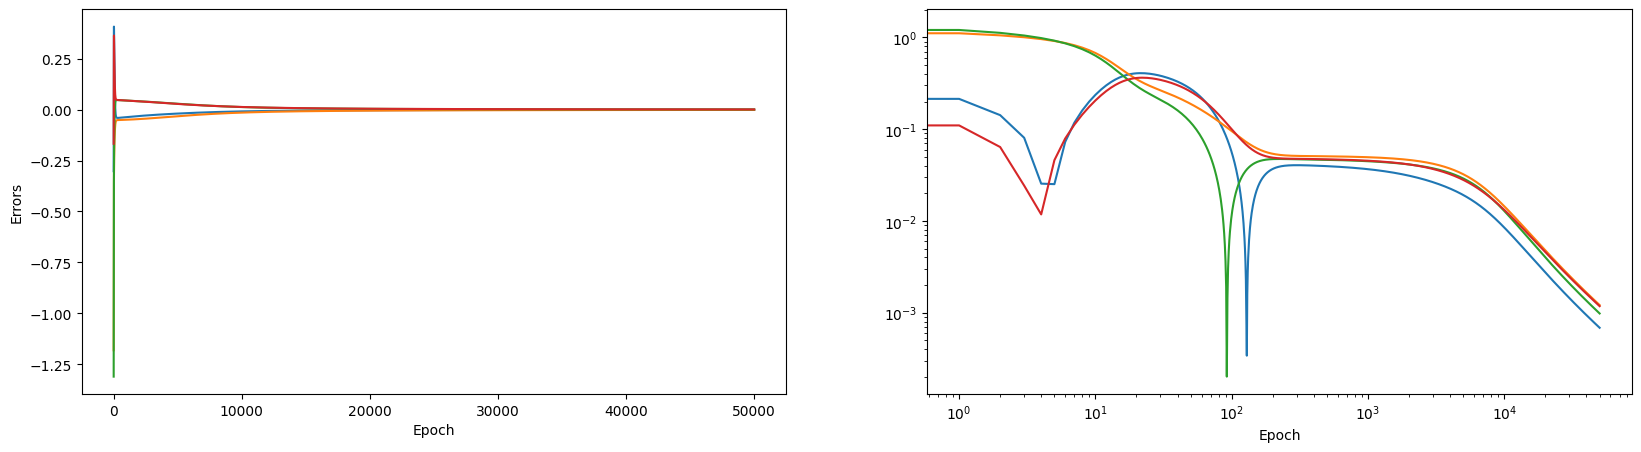

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(range(NITER), errors)
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Errors")
ax[1].loglog(range(NITER), np.abs(errors))
ax[1].set_xlabel("Epoch")

In [7]:
#print(weights)
#print(weights.shape)
input_new = np.array([1, 0, 0]).reshape(3, 1)
#print(input_new)
#print(input_new.shape)
#print(np.sum(weights*input_new))
print(sigmoid(np.sum(weights*input_new)))

0.9940596831648502


# Chat gpt answer 

In [8]:
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))


def train_nn(training_inputs, training_outputs, initial_weights, initial_W_f, niter, errors_data, alpha=0.1):
    """
    training_inputs: (N, 3)
    training_outputs: (N, 1)
    initial_weights: input → hidden (3, 2)
    initial_W_f: hidden → output (2, 1)
    niter: epochs
    errors_data: (niter, N) per-sample errors
    alpha: learning rate (smaller by default since we don't divide by N)
    """
    X = training_inputs
    y_true = training_outputs
    w = initial_weights.copy()
    W_f = initial_W_f.copy()

    # simple elementwise grad clip to avoid blow-ups
    def clip_(g, lim=1.0):
        return np.clip(g, -lim, lim)

    for ii in range(niter):
        # ---------- Forward ----------
        z_hidden = X @ w
        # clip pre-activations to keep exp() in a safe range
        z_hidden = np.clip(z_hidden, -50.0, 50.0)

        # numerically stable sigmoid
        hidden_output = np.where(
            z_hidden >= 0,
            1.0 / (1.0 + np.exp(-z_hidden)),
            np.exp(z_hidden) / (1.0 + np.exp(z_hidden))
        )  # (N, 2)

        y_pred = hidden_output @ W_f  # linear output, shape (N, 1)

        # ---------- Errors ----------
        error_output = y_pred - y_true  # (N, 1)
        errors_data[ii] = error_output.ravel()

        # ---------- Gradients (compute first, then update) ----------
        # hidden → output
        delta_W_f = hidden_output.T @ error_output  # (2, 1)

        # backprop to hidden using the *current* W_f (not the updated one)
        error_hidden = error_output @ W_f.T  # (N, 2)
        sigmoid_prime_hidden = hidden_output * (1.0 - hidden_output)  # (N, 2)
        delta_hidden = error_hidden * sigmoid_prime_hidden            # (N, 2)

        # input → hidden
        delta_w = X.T @ delta_hidden  # (3, 2)

        # optional gradient clipping
        delta_W_f = clip_(delta_W_f, lim=1.0)
        delta_w   = clip_(delta_w,   lim=1.0)

        # ---------- Updates (no /N averaging) ----------
        W_f = W_f - alpha * delta_W_f
        w   = w   - alpha * delta_w

    return y_pred, w, W_f

